#CODECHEF-VIT RECRUITMENTS 2025

# **Step 0: Copy this notebook**

Guidelines:

*   Make a copy of this notebook in your Google Drive
*   
Submit the editted colab notebook as your final submission



# **Step 1: Dataset for this task**

Guidelines: Download the dataset from the link provided and import it into your notebook

Link: https://drive.google.com/file/d/1F65Br7-pkcTZ05d9JG_-qdsKCd_WOyKo/view

# **Step 2: Import necessary libraries**

Guidelines: Import all required libraries here

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# **Step 3: Import Dataset**

Guidelines: Import the csv dataset into a dataframe

In [2]:
df = pd.read_csv('customer_data.csv')

In [3]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [5]:
df.describe() #we get all statistics of all numerical data given below.

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


# Step 4: Data Cleaning

Guidelines: Prepare the data for analysis

In [6]:
df.isnull().sum() # there are no null values to be removed

,0
id,0
age,0
gender,0
income,0
education,0
region,0
loyalty_status,0
purchase_frequency,0
purchase_amount,0
product_category,0


In [7]:
df.dropna(inplace=True) #deleting rows with null values

In [8]:
df.duplicated().sum() #there are no duplicate values in the dataset

0

In [9]:
df = df.drop_duplicates() #dropping duplicated values

In [10]:
df.shape

(100000, 12)

In [11]:
education_mapping = {'HighSchool': 0, 'College': 1, 'Bachelor': 2, 'Masters': 3}
loyalty_mapping = {'Regular': 0, 'Silver': 1, 'Gold': 2}
purchase_frequency_mapping = {'rare': 0, 'occasional': 1, 'frequent': 2}

# Apply manual encoding
df['education'] = df['education'].map(education_mapping)
df['loyalty_status'] = df['loyalty_status'].map(loyalty_mapping)
df['purchase_frequency'] = df['purchase_frequency'].map(purchase_frequency_mapping)

# Apply Label Encoding to nominal categories
label_encoders = {}
nominal_features = ['region', 'product_category', 'gender']

for col in nominal_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform categorical values into numbers
    label_encoders[col] = le  # Save the encoder for future use


In [12]:
print("Education Mapping:", education_mapping)
print("Loyalty Status Mapping:", loyalty_mapping)
print("Purchase Frequency Mapping:", purchase_frequency_mapping)

for col, le in label_encoders.items():
    print(f"{col} Mapping:")
    for i, class_ in enumerate(le.classes_):
        print(f"  {class_} -> {i}")
    print()

Education Mapping: {'HighSchool': 0, 'College': 1, 'Bachelor': 2, 'Masters': 3}
Loyalty Status Mapping: {'Regular': 0, 'Silver': 1, 'Gold': 2}
Purchase Frequency Mapping: {'rare': 0, 'occasional': 1, 'frequent': 2}
region Mapping:
  East -> 0
  North -> 1
  South -> 2
  West -> 3

product_category Mapping:
  Beauty -> 0
  Books -> 1
  Clothing -> 2
  Electronics -> 3
  Food -> 4
  Health -> 5
  Home -> 6

gender Mapping:
  Female -> 0
  Male -> 1



In [13]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,1,40682,2,0,2,2,18249,1,0,6
1,2,29,1,15317,3,3,0,0,4557,2,1,6
2,3,37,1,38849,2,3,1,0,11822,2,0,6
3,4,30,1,11568,0,2,0,2,4098,4,0,7
4,5,31,0,46952,1,1,0,1,19685,2,1,5


# Step 5: Analysis

Guidelines: Perform your analysis here

In [14]:
sns.set(style="whitegrid")

Age Distribution

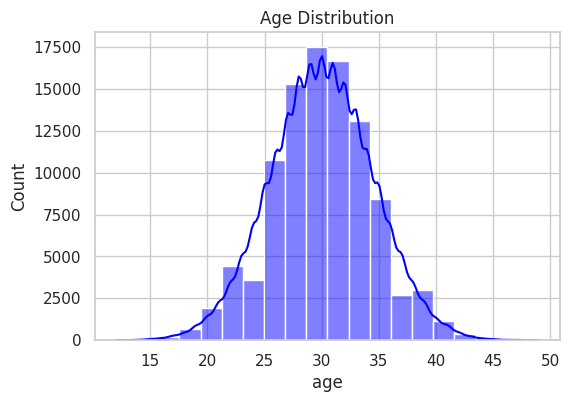

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

Income Distribution

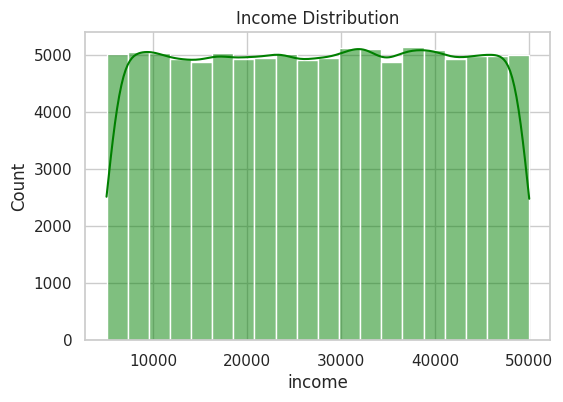

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(df['income'], bins=20, kde=True, color='green')
plt.title("Income Distribution")
plt.show()

Purchase Amount Distribution

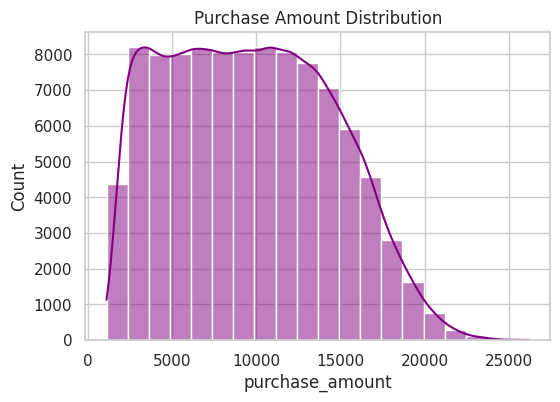

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(df['purchase_amount'], bins=20, kde=True, color='purple')
plt.title("Purchase Amount Distribution")
plt.show()

Box plot for income

Text(0.5, 1.0, 'Income Box Plot')

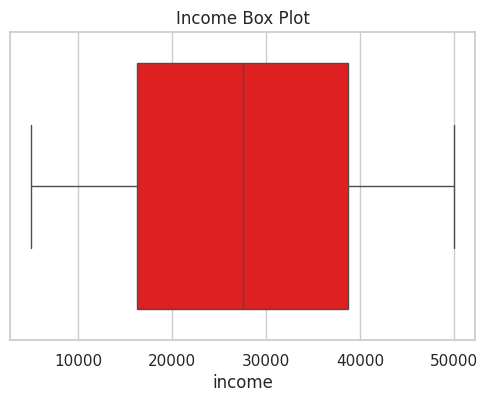

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['income'], color='red')
plt.title("Income Box Plot")

Text(0.5, 1.0, 'Purchase Amount Box Plot')

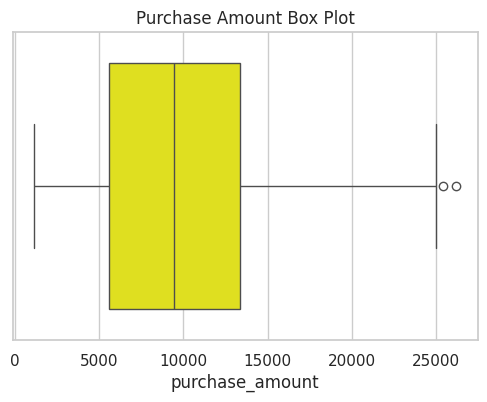

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['purchase_amount'], color='yellow')
plt.title("Purchase Amount Box Plot")

In [20]:
x = df[['income', 'purchase_amount']]

In [21]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

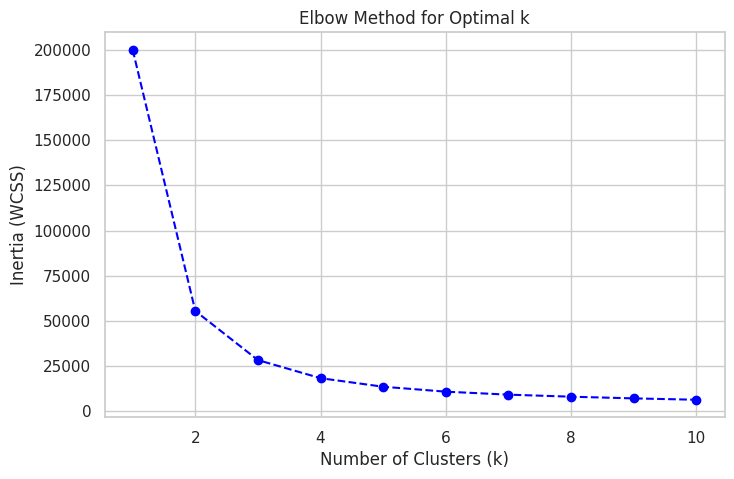

In [22]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [23]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(x_scaled)

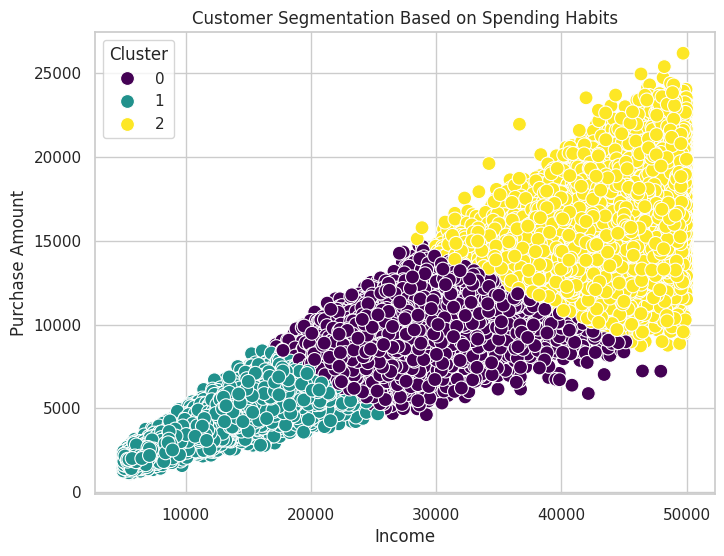

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['income'], y=df['purchase_amount'], hue=df['Cluster'], palette='viridis', s=100)
plt.title("Customer Segmentation Based on Spending Habits")
plt.xlabel("Income")
plt.ylabel("Purchase Amount")
plt.legend(title="Cluster")
plt.show()

In [25]:
cluster_summary = df.groupby("Cluster")[["income", "purchase_amount"]].mean()
print(cluster_summary)

               income  purchase_amount
Cluster                               
0        28169.987161      9653.903857
1        12702.957584      4358.942651
2        42561.511774     15219.902561


<ipython-input-26-957b0bfe0627>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['product_category'], order=df['product_category'].value_counts().index, palette="coolwarm")


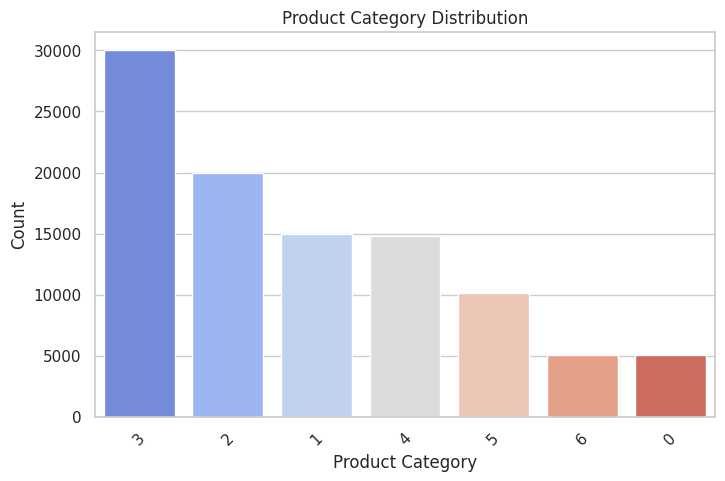

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['product_category'], order=df['product_category'].value_counts().index, palette="coolwarm")
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

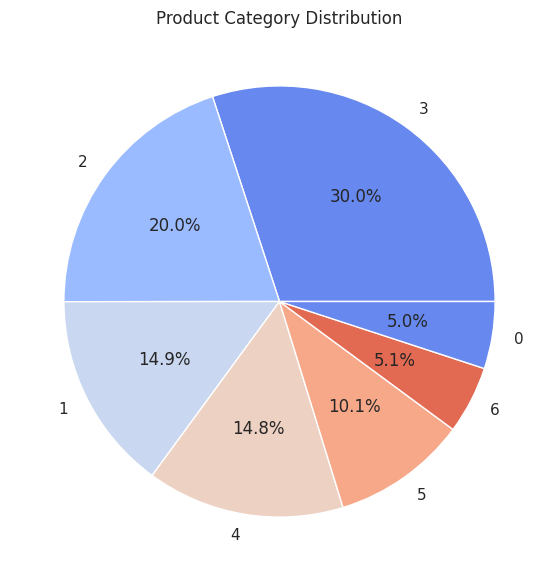

In [27]:
plt.figure(figsize=(7, 7))
df['product_category'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm'))
plt.title("Product Category Distribution")
plt.ylabel("")
plt.show()

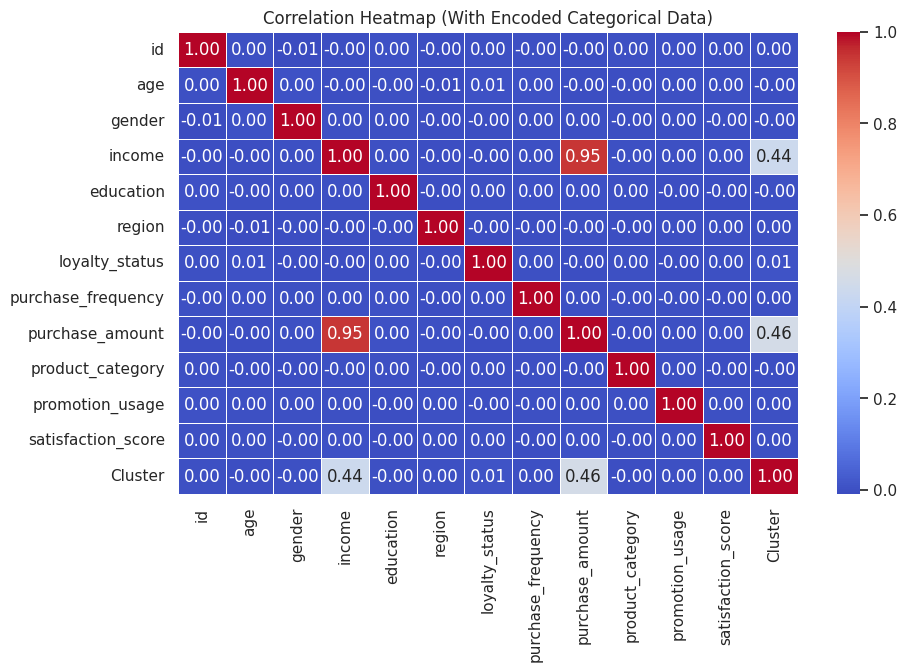

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Encoded Categorical Data)")
plt.show()

# Step 6: Results and Inferences
Guidelines: List out your inferences here

**Heatmap Inference**

*   Strong Positive Correlation(0.95) between income and purchase_amount
*   Moderate Positive Correlation (0.46) between income and cluster

*   No significant relation between satisfaction_score and any feature
*   Similarly loyalty status has weak correlations and gender has no correlations to other features.

**Histograms**


*   Age distributions shows normal distributions with a slight skew
*   Right-skewed, meaning a few customers have very high incomes, i.e, most customers are mid-income range and only few high-value customers contribute to significant total revenue.

**Box Plot**


*   Income vs. Purchase Amount: A few customers spend much more than average.
*   Purchase Frequency vs. Purchase Amount: Frequent buyers tend to spend more.

*   There are clear outliers in spending (likely luxury shoppers).

**Customer Segmentation (Clustering using KMeans)**

*   Cluster 0: Low spenders (probably budget conscious)
*   Cluster 1: Mid level spenders (occasional buyers)
*   Cluster 2: High-value customers (loyal, frequent_buyers)
*   Majority fall into mid-level spenders.



**Product Category Insights (Bar Chart/Pie Chart)**


*   Top Categories: Clothing, Electronics and Food
*   Least Popular: Beauty and Books.















